# Webscraping avec python

Pour tester les exemples présentés dans ce chapitre:

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABnotebooks/course/modern-ds/dallE.ipynb%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=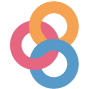" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/modern-ds/dallE.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

<div class="alert alert-info" role="alert">

L’utilisation de ce tutoriel est assez exigeante en termes d’infrastructure
car il est nécessaire de disposer de GPU.

Bien qu’il en existe sur
le *cloud* du SSPCloud, je n’ai pas encore eu le temps de creuser la configuration
à mettre en oeuvre pour répliquer ce chapitre.

Pour le moment, il faudra
se contenter de `Google Colab` pour tester ces exemples. La configuration
à mettre en oeuvre pour tester ces exemples est présentée dans une autre
boîte.

</div>

<div class="alert alert-info" role="alert">

Par défaut, Colab n’utilise pas de GPU mais de la CPU. Il est donc nécessaire
d’éditer les paramètres d’exécution du Notebook
- Dans le menu `Exécution`, cliquer sur `Modifier le type d'exécution`
- Sélectionner `GPU` sous `Accélérateur matériel`

</div>

# Contexte

La publication par l’organisation [Open AI](https://openai.com/) de
son modèle de génération de contenu créatif [Dall-E-2](https://openai.com/dall-e-2/)
(un jeu de mot mélangeant Dali et Wall-E) a créé un bruit inédit dans
le monde de la *data-science*.
Un compte twitter ([@Weird Dall-E Mini Generations](https://twitter.com/weirddalle))
propose de nombreuses générations de contenu drôles ou incongrues.
Le bloggeur tech Casey Newton a pu parler d’une
[révolution créative dans le monde de l’IA](https://www.platformer.news/p/how-dall-e-could-power-a-creative).

![](https://upload.wikimedia.org/wikipedia/commons/2/2b/A_Shiba_Inu_dog_wearing_a_beret_and_black_turtleneck_DALLE2.jpg)

Dall-E-2 s’appuie sur des réseaux de neurone à différents niveaux :

-   le contenu de la phrase est analysé par un réseau de neurone similaire (mais bien sûr plus évolué) que
    ceux que nous avons présenté dans la partie [NLP](#nlp)
-   les éléments importants de la phrase (recontextualisés) sont ensuite transformés en image à partir de
    modèles entraînés à reconnaître des images

Jusqu’à présent, l’inconvénient principal de `Dall-E`
pour générer facilement du contenu
était que le nombre de contenu pouvant être payé
avec un accès gratuit était limité (50 crédits gratuits par mois).
Depuis le 22 août 2022, un générateur similaire est disponible gratuitement,
avec une licence permissive<a name="cite_ref-1"></a>[<sup>\[1\]</sup>](#cite_note-1). Celui-ci, développé
par une équipe de chercheurs \[@Rombach_2022_CVPR\],
s’appelle `Stable Diffusion` ([dépôt `Github` pour le code source](https://github.com/CompVis/stable-diffusion) et
[dépôt `HuggingFace` pour le modèle mis à disposition](https://huggingface.co/CompVis/stable-diffusion-v1-4)).
Un [excellent article de blog](https://huggingface.co/blog/stable_diffusion) décrit la démarche de `Stable Diffusion`

Il est notamment possible de réutiliser l’image générée à des fins commerciales. En revanche, il est interdit de chercher à nuire à une personne. Pour cette raison, il est fréquent que les visages de personnes célèbres soient floutés pour éviter la création de contenu nuisant à leur réputation.